<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Importing-files" data-toc-modified-id="Importing-files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing files</a></span></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#-Cleaned-Text" data-toc-modified-id="-Cleaned-Text-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span> Cleaned Text</a></span></li><li><span><a href="#-Plotting-" data-toc-modified-id="-Plotting--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span> Plotting </a></span><ul class="toc-item"><li><span><a href="#-Count-Plot-" data-toc-modified-id="-Count-Plot--3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span> Count Plot </a></span><ul class="toc-item"><li><span><a href="#-Unfiltered-Data-" data-toc-modified-id="-Unfiltered-Data--3.2.1.1"><span class="toc-item-num">3.2.1.1&nbsp;&nbsp;</span> Unfiltered Data </a></span></li><li><span><a href="#-Filtered-Data" data-toc-modified-id="-Filtered-Data-3.2.1.2"><span class="toc-item-num">3.2.1.2&nbsp;&nbsp;</span> Filtered Data</a></span></li></ul></li><li><span><a href="#-Word-Cloud" data-toc-modified-id="-Word-Cloud-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span> Word Cloud</a></span><ul class="toc-item"><li><span><a href="#-Unfiltered-Data" data-toc-modified-id="-Unfiltered-Data-3.2.2.1"><span class="toc-item-num">3.2.2.1&nbsp;&nbsp;</span> Unfiltered Data</a></span></li><li><span><a href="#-Filtered-Data" data-toc-modified-id="-Filtered-Data-3.2.2.2"><span class="toc-item-num">3.2.2.2&nbsp;&nbsp;</span> Filtered Data</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Language-Model" data-toc-modified-id="Language-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Language Model</a></span><ul class="toc-item"><li><span><a href="#-Tokenization-" data-toc-modified-id="-Tokenization--4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span> Tokenization </a></span></li><li><span><a href="#-Input-Sequences-" data-toc-modified-id="-Input-Sequences--4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span> Input Sequences </a></span></li><li><span><a href="#-Preparing-Input-and-Output" data-toc-modified-id="-Preparing-Input-and-Output-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span> Preparing Input and Output</a></span><ul class="toc-item"><li><span><a href="#-Tokenization-" data-toc-modified-id="-Tokenization--4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span> Tokenization </a></span></li><li><span><a href="#-Input-and-Output-" data-toc-modified-id="-Input-and-Output--4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span> Input and Output </a></span></li></ul></li><li><span><a href="#-LSTM-Model-" data-toc-modified-id="-LSTM-Model--4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span> LSTM Model </a></span></li><li><span><a href="#-Text-Generation-" data-toc-modified-id="-Text-Generation--4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span> Text Generation </a></span></li></ul></li></ul></div>

# Imports

In [66]:
import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud

from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
import keras.utils as ku 
import tensorflow as tf

import numpy as np

In [67]:
%matplotlib inline

In [68]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


# Importing files

In [69]:
file = open(r'gita.txt')
geeta_raw_text = file.read()
geeta_raw_text = re.sub(r'[^\w]', ' ', geeta_raw_text)

In [70]:
print('Some text from geeta :',geeta_raw_text[:140])

Some text from geeta :  I Dhritirashtra  Ranged thus for battle on the sacred plain   On Kurukshetra  say  Sanjaya  say What wrought my people  and the Pandavas   


# Data analysis

Text is mostly clean, so we don't to clean it up and we can start analyzing it directly.

In [71]:
# Tokenization
vocab_to_int = dict() # Dictionary to hold word counts
def word_to_int(text):
    for word in text.lower().split():
        if word in vocab_to_int:
            vocab_to_int[word] +=1
        else:
            vocab_to_int[word] =1

word_to_int(geeta_raw_text)
print('Number of unique words :', len(vocab_to_int))

Number of unique words : 3419


In [72]:
# Sorting dictionary
vocab_to_int = {k: v for k, v in sorted(vocab_to_int.items(), key=lambda item: item[1], reverse=True)}

In [73]:
# Top words to occur in text
list(vocab_to_int)[:10]

['the', 'and', 'of', 'to', 'in', 'is', 'all', 'me', 'i', 'that']

<h2> Cleaned Text</h2>

All of most frequently occurring words are stop words. In order to analyze properly we need to get rid of stop words.

In [74]:
# Getting rid of stop words
stop_words = set(stopwords.words('english'))  
filtered_geeta = [w for w in geeta_raw_text.lower().split() if not w in stop_words]

In [75]:
# creating filtered dictionary
vocab_to_int_filtered = dict()
for word in filtered_geeta:
    if word in vocab_to_int_filtered:
        vocab_to_int_filtered[word] +=1
    else:
        vocab_to_int_filtered[word] =1

In [76]:
# Top words to occur in text
list(vocab_to_int_filtered)[:20]

['dhritirashtra',
 'ranged',
 'thus',
 'battle',
 'sacred',
 'plain',
 'kurukshetra',
 'say',
 'sanjaya',
 'wrought',
 'people',
 'pandavas',
 'beheld',
 'host',
 'raja',
 'duryodhana',
 'drona',
 'drew',
 'spake',
 'words']

Now it looks believable since these words are clearly related to Geeta. Lets plot it now to know word counts.

<h2> Plotting </h2>

<h3> Count Plot </h3>

<h4> Unfiltered Data </h4>

In [77]:
# creating data from for filtered dictionary
unfiltered_words = list(vocab_to_int)
unfiltered_count = [w[1] for w in vocab_to_int.items()]
d = {'word':unfiltered_words,
    'count': unfiltered_count}
unfiltered_top_word_df = pd.DataFrame(data=d, index=range(len(vocab_to_int.keys())))

In [78]:
unfiltered_top_word_df = unfiltered_top_word_df.sort_values(by=['count'], ascending=False)
unfiltered_top_word_df.head()

,word,count
0,the,946
1,and,794
2,of,740
3,to,403
4,in,279


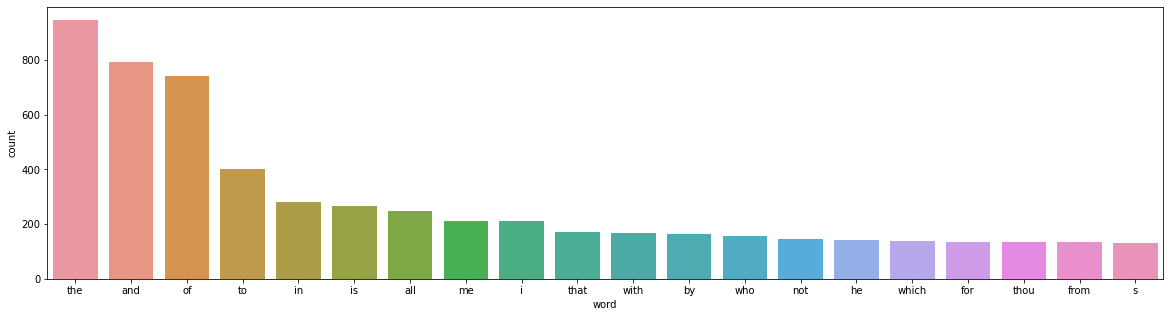

In [79]:
f, ax1 = plt.subplots(figsize=(20,5))
unfiltered_word_count_plot = sns.barplot(x='word', y='count', data=unfiltered_top_word_df[:20], ax=ax1)
plt.show()

<h4> Filtered Data</h4>

In [80]:
# creating data from for filtered dictionary
filtered_words = list(vocab_to_int_filtered)
filtered_count = [w[1] for w in vocab_to_int_filtered.items()]
d = {'word':filtered_words,
    'count': filtered_count}
top_word_df = pd.DataFrame(data=d, index=range(len(vocab_to_int_filtered.keys())))

In [81]:
top_word_df = top_word_df.sort_values(by=['count'], ascending=False)
top_word_df.head()

,word,count
66,thou,134
217,one,96
31,thy,93
526,soul,93
470,thee,90


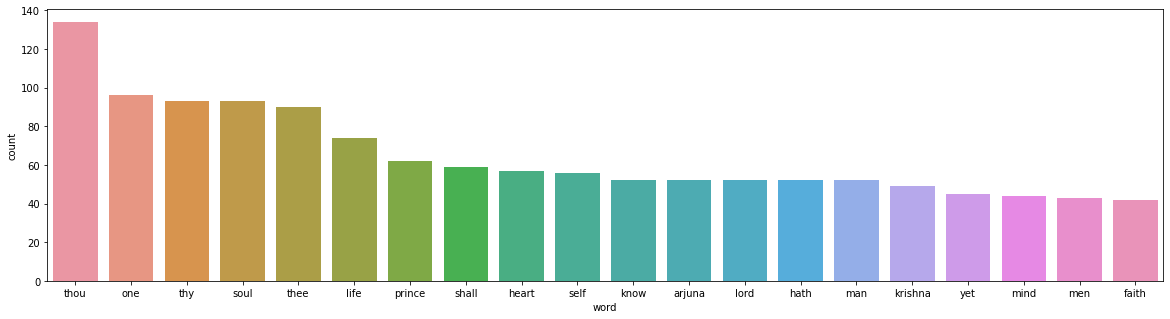

In [82]:
f, ax2 = plt.subplots(figsize=(20,5))
word_count_plot = sns.barplot(x='word', y='count', data=top_word_df[:20], ax=ax2)
plt.show()

Since its a spiritual text we are able to see words like soul, heart, self, faith and mind, also the two main characters in whole of Geeta was Arjuna and Krishna.

<h3> Word Cloud</h3>

<h4> Unfiltered Data</h4>

In [83]:
unfiltered_wordcloud = WordCloud(max_font_size=50, width=600, height=300,max_words=2000).generate(' '.join(unfiltered_words))

(-0.5, 599.5, 299.5, -0.5)

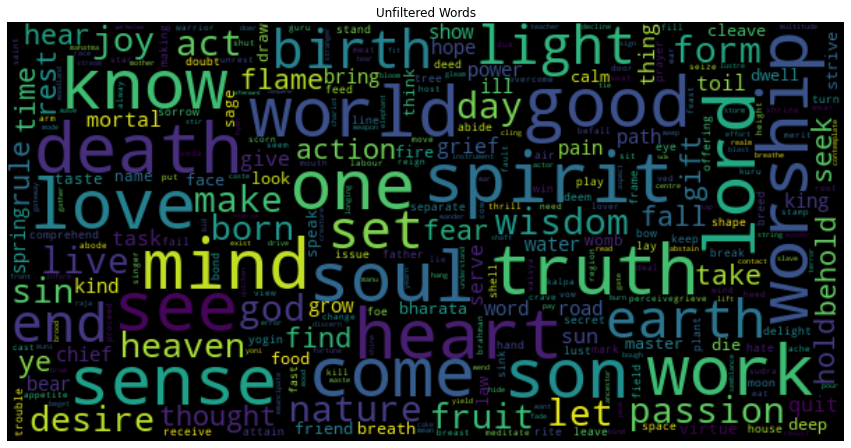

In [84]:
plt.figure(figsize=(15,15))
plt.imshow(unfiltered_wordcloud, interpolation='bilinear')
plt.title("Unfiltered Words")
plt.axis("off")

<h4> Filtered Data</h4>

In [85]:
wordcloud = WordCloud(max_font_size=50, width=600, height=300,max_words=2000).generate(' '.join(filtered_words))

(-0.5, 599.5, 299.5, -0.5)

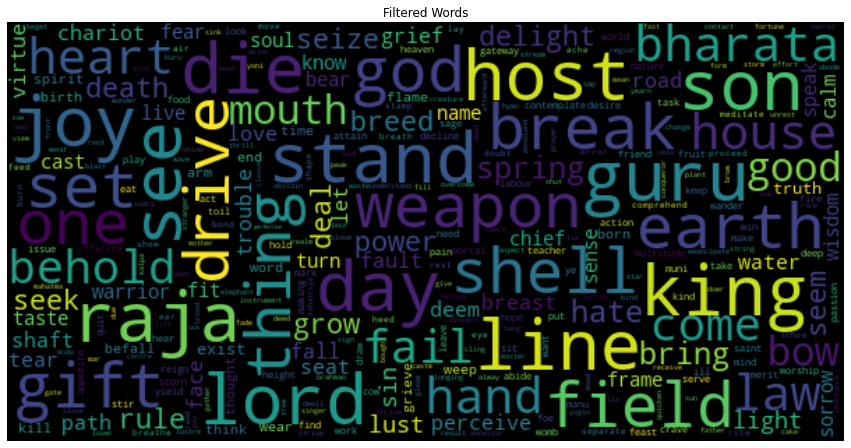

In [86]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Filtered Words")
plt.axis("off")

By far we are quite optimistic that dataset is good for language model.

# Language Model

<h2> Tokenization </h2>

In [87]:
geeta_lower_clean = geeta_raw_text.lower().split()
print('Some text :', geeta_lower_clean[:50])

Some text : ['i', 'dhritirashtra', 'ranged', 'thus', 'for', 'battle', 'on', 'the', 'sacred', 'plain', 'on', 'kurukshetra', 'say', 'sanjaya', 'say', 'what', 'wrought', 'my', 'people', 'and', 'the', 'pandavas', 'sanjaya', 'when', 'he', 'beheld', 'the', 'host', 'of', 'pandavas', 'raja', 'duryodhana', 'to', 'drona', 'drew', 'and', 'spake', 'these', 'words', 'ah', 'guru', 'see', 'this', 'line', 'how', 'vast', 'it', 'is', 'of', 'pandu']


In [88]:
print('Total number of words :', len(geeta_lower_clean))
print('Total number of unique words :', len(set(geeta_lower_clean)))
n_vocab = len(set(geeta_lower_clean))

Total number of words : 19547
Total number of unique words : 3419


<h2> Input Sequences </h2>

In [89]:
# we will use 50 words of sequences and 1 for output
seq_len = 50 + 1
lines = []
for i in range(seq_len, len(geeta_lower_clean)):
    seq = geeta_lower_clean[i-seq_len :i]
    line = ' '.join(seq)
    lines.append(line)
    
    if i > 19500:
        break

In [90]:
print('Total numbers of lines :',len(lines))
print('\n',lines[0])

Total numbers of lines : 19451

 i dhritirashtra ranged thus for battle on the sacred plain on kurukshetra say sanjaya say what wrought my people and the pandavas sanjaya when he beheld the host of pandavas raja duryodhana to drona drew and spake these words ah guru see this line how vast it is of pandu fighting


<h2> Preparing Input and Output</h2>

<h3> Tokenization </h3>

In [91]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [92]:
# Convert sequences in np array
sequences = np.array(sequences)

<h3> Input and Output </h3>

In [93]:
# getting X and y
X, y = sequences[:, :-1], sequences[:,-1]
print('Size of X :', len(X))
print('Size of 1 line :', len(X[0]))
print('Output of 1st line :', y[0])

Size of X : 19451
Size of 1 line : 50
Output of 1st line : 1597


In [94]:
# Since output of y is a word we need to change it in one hot vector
y = ku.to_categorical(y, num_classes=n_vocab)
print('One hot encoded output vector :', y[0])

One hot encoded output vector : [0. 0. 0. ... 0. 0. 0.]


In [95]:
# This will help us to get back the word
#tokenizer.word_index
print('Length of vocabulary :', len(tokenizer.word_index))

Length of vocabulary : 3418


In [96]:
# defining sequence_length
sequence_length = X.shape[1]

<h2> LSTM Model </h2>

In [97]:
embedding_size = 50
batch_size = 128
epochs = 100

In [98]:
model = Sequential()
model.add(Embedding(n_vocab, embedding_size, input_length=sequence_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100,activation='relu'))
model.add(Dense(n_vocab, activation='softmax'))

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            170950    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 3419)              345319    
Total params: 667,169
Trainable params: 667,169
Non-trainable params: 0
_________________________________________________________________


In [100]:
opt = Adam(learning_rate=0.003)

In [101]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [104]:
early_stop = EarlyStopping(monitor='accuracy', patience=5)

In [105]:
model.fit(x=X, y=y, batch_size=batch_size, epochs=epochs, callbacks=early_stop)

Epoch 1/100
152/152 [==============================] - 32s 209ms/step - loss: 6.8483 - accuracy: 0.0464
Epoch 2/100
152/152 [==============================] - 30s 199ms/step - loss: 6.4629 - accuracy: 0.0467
Epoch 3/100
152/152 [==============================] - 31s 207ms/step - loss: 6.3666 - accuracy: 0.0549
Epoch 4/100
152/152 [==============================] - 34s 223ms/step - loss: 6.2348 - accuracy: 0.0609
Epoch 5/100
152/152 [==============================] - 34s 224ms/step - loss: 6.1221 - accuracy: 0.0659
Epoch 6/100
152/152 [==============================] - 34s 225ms/step - loss: 6.0088 - accuracy: 0.0704
Epoch 7/100
152/152 [==============================] - 34s 227ms/step - loss: 5.8880 - accuracy: 0.0761
Epoch 8/100
152/152 [==============================] - 34s 224ms/step - loss: 5.7741 - accuracy: 0.0822
Epoch 9/100
152/152 [==============================] - 34s 224ms/step - loss: 5.6710 - accuracy: 0.0892
Epoch 10/100
152/152 [==============================] - 34s 226m

152/152 [==============================] - 34s 223ms/step - loss: 0.4042 - accuracy: 0.8939
Epoch 80/100
152/152 [==============================] - 34s 225ms/step - loss: 0.3555 - accuracy: 0.9089
Epoch 81/100
152/152 [==============================] - 34s 223ms/step - loss: 0.3178 - accuracy: 0.9211
Epoch 82/100
152/152 [==============================] - 34s 224ms/step - loss: 0.2972 - accuracy: 0.9261
Epoch 83/100
152/152 [==============================] - 34s 223ms/step - loss: 0.2809 - accuracy: 0.9296
Epoch 84/100
152/152 [==============================] - 34s 223ms/step - loss: 0.2731 - accuracy: 0.9309
Epoch 85/100
152/152 [==============================] - 34s 224ms/step - loss: 0.2978 - accuracy: 0.9224
Epoch 86/100
152/152 [==============================] - 34s 224ms/step - loss: 0.3317 - accuracy: 0.9098
Epoch 87/100
152/152 [==============================] - 35s 232ms/step - loss: 0.3916 - accuracy: 0.8885
Epoch 88/100
152/152 [==============================] - 34s 225ms/st

In [106]:
model.save('./model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model\assets


<h2> Text Generation </h2>

In [150]:
# Now we need 50 sequences of word so that we can predict something
seed_text =lines[np.random.randint(low=0, high=n_vocab)]

In [146]:
def generate_sequence(model, tokenizer, text_seq_length, seed_text, n_words):
    text = []
    
    for _ in range(n_words):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        encoded = pad_sequences([encoded], maxlen=text_seq_length, truncating='pre')
        
        y_pred = np.argmax(model.predict(encoded), axis=-1)
        
        predicted_word =''
        for word, index in tokenizer.word_index.items():
            if index == y_pred:
                predicted_word = word
                break
        seed_text = seed_text + ' '+ predicted_word
        text.append(predicted_word)
    return ' '.join(text)

In [ ]:
generated_text = generate_sequence(model, tokenizer, text_seq_length=sequence_length, seed_text=seed_text, n_words=200)
print(seed_text)
print('\n', generated_text)